In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # 绘图使用
# 支持中文
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
%matplotlib inline 

# 读取数据

df = pd.read_csv('assets/SH600519.csv', index_col=0)  # 读取 上证600519 贵州茅台股票数据 index_col=0表示去掉自动增添的索引列
df.sample(5)

,date,open,close,high,low,volume,code
1331,2015-07-09,201.180,219.085,221.182,197.901,138203.0,600519
1171,2014-11-13,129.715,128.746,129.723,127.133,49155.0,600519
339,2011-06-03,132.704,136.305,137.007,132.704,29483.0,600519
803,2013-05-10,143.348,143.421,146.193,142.620,48776.0,600519
2475,2020-03-20,1011.000,1035.280,1043.000,1011.000,60139.0,600519


In [2]:
# 将列 date 转化为日期时间类型，并设置为索引

# 将'date'列转换为日期时间类型
df['date'] = pd.to_datetime(df['date'])

# 将日期时间列设置为索引
df.set_index('date', inplace=True)

df

,open,close,high,low,volume,code
date,,,,,,
2010-04-26,88.702,87.381,89.072,87.362,107036.13,600519
2010-04-27,87.355,84.841,87.355,84.681,58234.48,600519
2010-04-28,84.235,84.318,85.128,83.597,26287.43,600519
2010-04-29,84.592,85.671,86.315,84.592,34501.20,600519
2010-04-30,83.871,82.340,83.871,81.523,85566.70,600519
...,...,...,...,...,...,...
2020-04-20,1221.000,1227.300,1231.500,1216.800,24239.00,600519
2020-04-21,1221.020,1200.000,1223.990,1193.000,29224.00,600519
2020-04-22,1206.000,1244.500,1249.500,1202.220,44035.00,600519


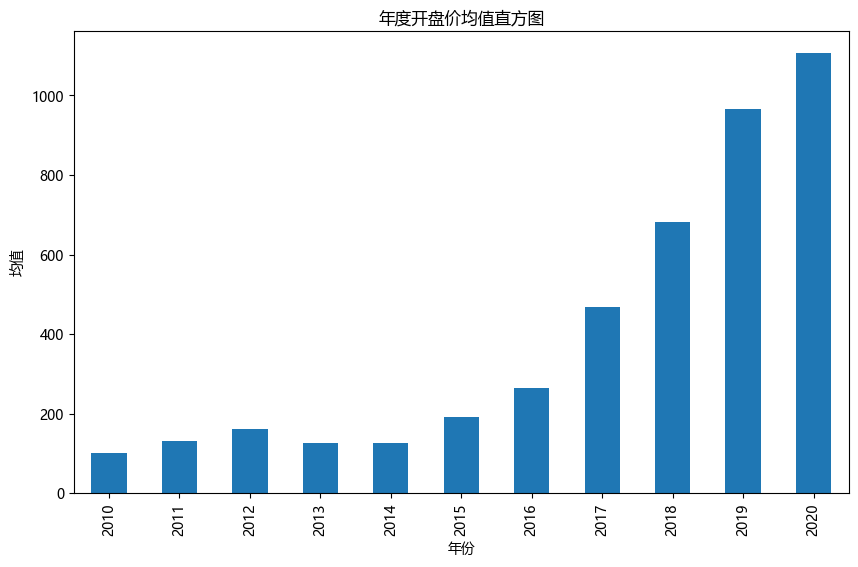

In [3]:
# 按年份分组并计算每组的开盘价均值
yearly_open_mean = df.groupby(df.index.year)['open'].mean()

# 绘制直方图
yearly_open_mean.plot(kind='bar', figsize=(10, 6))
plt.title('年度开盘价均值直方图')
plt.xlabel('年份')
plt.ylabel('均值')

# 显示图形
plt.show()

In [4]:
#读取数据

df = pd.read_csv('assets/Month_Value_1.csv')  # 读取数据
display( df.head(5) )
df.info()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Period                                    96 non-null     object 
 1   Revenue                                   64 non-null     float64
 2   Sales_quantity                            64 non-null     float64
 3   Average_cost                              64 non-null     float64
 4   The_average_annual_payroll_of_the_region  64 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


In [5]:
### 问题1：将列 Period 转化为  日期时间（datetime） 类型，并按列 Period 排序。

df["Period"] = pd.to_datetime(df['Period'])
df.sort_values(by='Period',inplace=True)

df

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
1,2015-01-02,1.580759e+07,11636.0,1358.507000,30024676.0
2,2015-01-03,2.204715e+07,15922.0,1384.697024,30024676.0
3,2015-01-04,1.881458e+07,15227.0,1235.606705,30024676.0
4,2015-01-05,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...,...
91,2022-01-08,NaN,NaN,NaN,NaN
92,2022-01-09,NaN,NaN,NaN,NaN
93,2022-01-10,NaN,NaN,NaN,NaN
94,2022-01-11,NaN,NaN,NaN,NaN


In [39]:
df['Period'] = pd.to_datetime(df['Period']).dt.to_period('D')
df.set_index('Period', inplace=True)

# 显示转换后的数据框
df

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
NaT,1.601007e+07,12729.0,1257.763541,30024676.0
NaT,1.580759e+07,11636.0,1358.507000,30024676.0
NaT,2.204715e+07,15922.0,1384.697024,30024676.0
NaT,1.881458e+07,15227.0,1235.606705,30024676.0
NaT,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...
NaT,5.875647e+07,38069.0,1543.420464,29878525.0
NaT,5.628830e+07,27184.0,2070.640850,29044998.0
NaT,4.022524e+07,23509.0,1711.057181,29044998.0


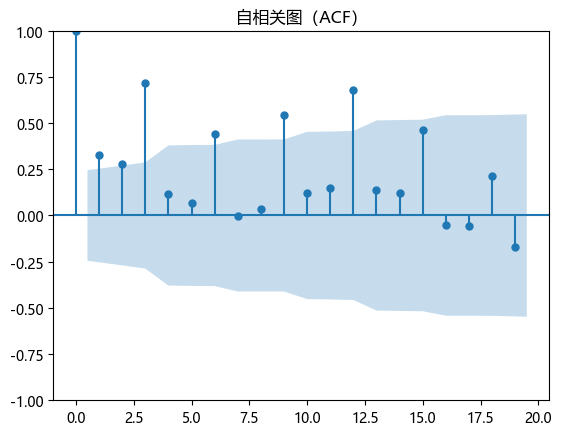

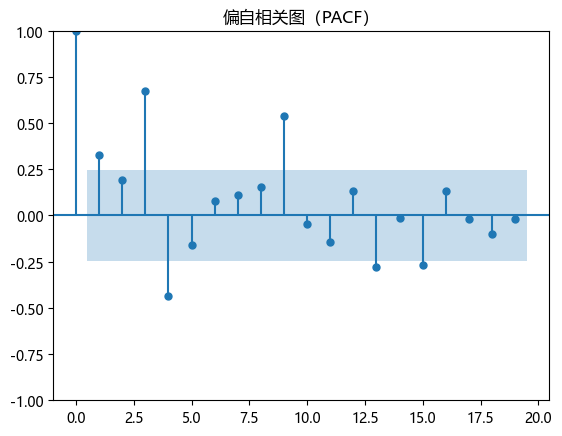

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df_clean = df.dropna(subset=['Sales_quantity'])

# 绘制Sales_quantity列的自相关图（ACF）
plot_acf(df_clean['Sales_quantity'])
plt.title('自相关图（ACF）')
plt.show()

# 绘制Sales_quantity列的偏自相关图（PACF）
plot_pacf(df_clean['Sales_quantity'])
plt.title('偏自相关图（PACF）')
plt.show()

In [8]:
df.dropna(inplace=True)


In [9]:
df

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
2015-01-02,1.580759e+07,11636.0,1358.507000,30024676.0
2015-01-03,2.204715e+07,15922.0,1384.697024,30024676.0
2015-01-04,1.881458e+07,15227.0,1235.606705,30024676.0
2015-01-05,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...
2019-01-12,5.875647e+07,38069.0,1543.420464,29878525.0
2020-01-01,5.628830e+07,27184.0,2070.640850,29044998.0
2020-01-02,4.022524e+07,23509.0,1711.057181,29044998.0


In [10]:
df.index

PeriodIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
             '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
             '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
             '2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
             '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
             '2016-01-09', '2016-01-10', '2016-01-11', '2016-01-12',
             '2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
             '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
             '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
             '2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
             '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
             '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
             '2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
             '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
             '2019-01-09', '2019-0

In [ ]:
df.groupby(df.index)['open'].mean()

D:\Programing\Control\Anaconda\envs\mining\lib\site-packages\matplotlib\cbook.py:1699: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)


<Axes: xlabel='Period'>

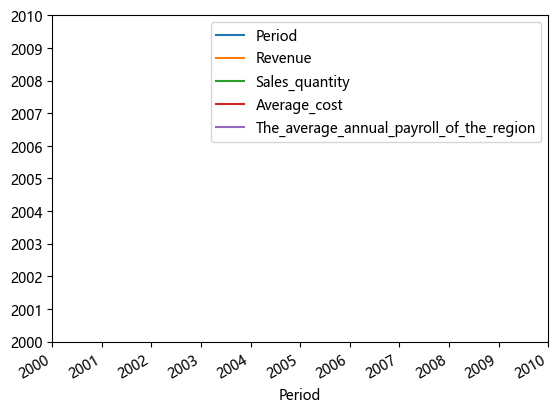

In [38]:
df.plot()

In [16]:
df.reset_index(inplace=True)


In [32]:
# df.set_index(df['Period'],inplace=True)
df['Period'] = df['Period'].dt.to_timestamp()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 64 entries, 2015-01-01 to 2020-01-04
Freq: D
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Period                                    0 non-null      datetime64[ns]
 1   Revenue                                   64 non-null     float64       
 2   Sales_quantity                            64 non-null     float64       
 3   Average_cost                              64 non-null     float64       
 4   The_average_annual_payroll_of_the_region  64 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.0 KB


In [36]:
df.set_index(df['Period'],inplace=True)

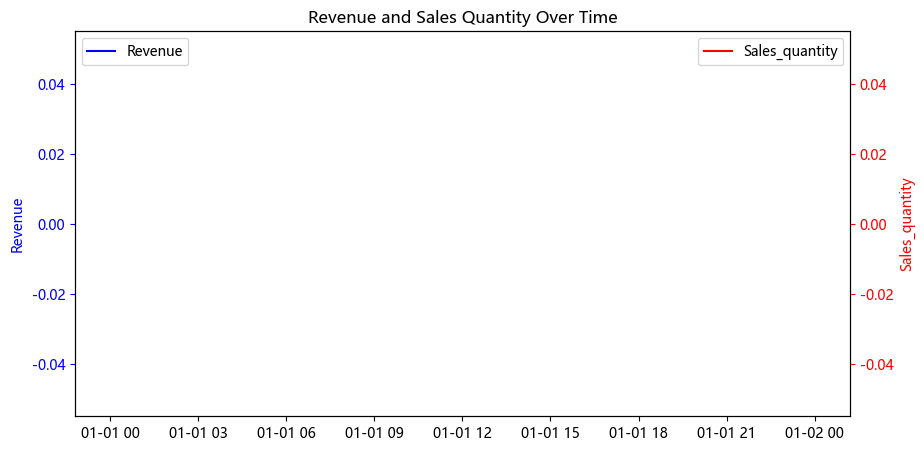

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# 创建一个图表和主 y 轴
fig, ax1 = plt.subplots(figsize=(10, 5))

# 绘制收入折线图（使用主 y 轴）
ax1.plot(df.index, df['Revenue'], label='Revenue', color='blue')
ax1.set_ylabel('Revenue', color='blue')  # 设置主 y 轴标签
ax1.tick_params('y', colors='blue')  # 设置主 y 轴刻度颜色

# 创建一个次要 y 轴
ax2 = ax1.twinx()

# 绘制销售量折线图（使用次要 y 轴）
ax2.plot(df.index, df['Sales_quantity'], label='Sales_quantity', color='red')
ax2.set_ylabel('Sales_quantity', color='red')  # 设置次要 y 轴标签
ax2.tick_params('y', colors='red')  # 设置次要 y 轴刻度颜色

# 设置图表标题和图例
plt.title('Revenue and Sales Quantity Over Time')
legend1 = ax1.legend(loc='upper left')
legend2 = ax2.legend(loc='upper right')

plt.show()  # 显示图表

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# 确保'Period'列是日期时间类型，并设置为索引
df['Period'] = pd.to_datetime(df['Period'])
# df.set_index('Period', inplace=True)

# 计算3期滚动平均值和滚动标准差
rolling_mean = df['Revenue'].rolling(window=3).mean()
rolling_std = df['Revenue'].rolling(window=3).std()

# 绘制原始收入数据和滚动平均值、滚动标准差
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Revenue'], label='Revenue', color='blue')
plt.plot(rolling_mean.index, rolling_mean, label='Rolling Mean', color='green', linestyle='--')
plt.fill_between(rolling_mean.index, rolling_mean - rolling_std, rolling_mean + rolling_std, color='grey', alpha=0.5)
plt.xlabel('Period')
plt.ylabel('Amount')
plt.title('Revenue with 3-Period Rolling Mean and Standard Deviation')
plt.legend()
plt.show()

# 重复上述步骤，针对销售量数据
rolling_mean_sales = df['Sales_quantity'].rolling(window=3).mean()
rolling_std_sales = df['Sales_quantity'].rolling(window=3).std()

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Sales_quantity'], label='Sales_quantity', color='red')
plt.plot(rolling_mean_sales.index, rolling_mean_sales, label='Rolling Mean', color='green', linestyle='--')
plt.fill_between(rolling_mean_sales.index, rolling_mean_sales - rolling_std_sales, rolling_mean_sales + rolling_std_sales, color='grey', alpha=0.5)
plt.xlabel('Period')
plt.ylabel('Amount')
plt.title('Sales_quantity with 3-Period Rolling Mean and Standard Deviation')
plt.legend()
plt.show()

TypeError: Passing PeriodDtype data is invalid. Use `data.to_timestamp()` instead

In [91]:
df.reset_index(inplace=True)

In [93]:
df = pd.read_csv('assets/sale_train.csv')  # 读取数据
display( df.sample(5) )
df.info()

,Date,store,product,number_sold
219669,2017-06-20,6,6,947
208321,2013-05-25,6,3,813
41224,2014-11-16,1,2,757
228845,2015-08-05,6,9,897
99585,2012-09-02,3,0,305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230090 entries, 0 to 230089
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Date         230090 non-null  object
 1   store        230090 non-null  int64 
 2   product      230090 non-null  int64 
 3   number_sold  230090 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.0+ MB


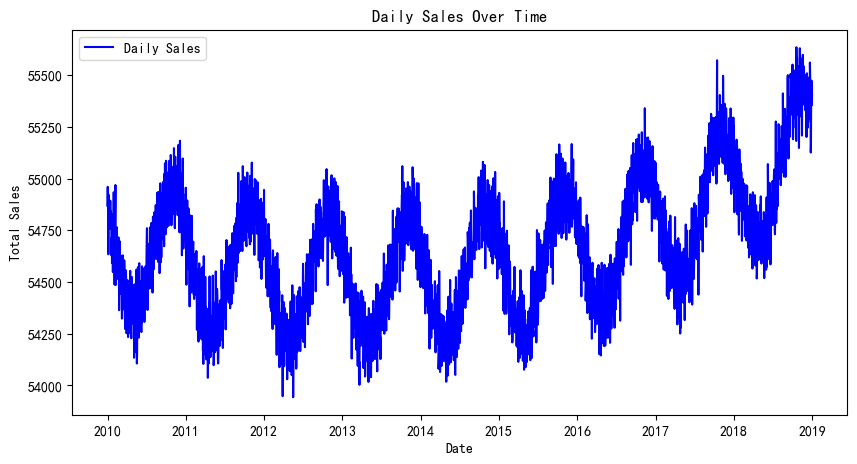

In [94]:
# 确保'Date'列是日期时间类型
df['Date'] = pd.to_datetime(df['Date'])

# 按日期统计销售数量（忽略商店ID和产品ID）
daily_sales = df.groupby(df['Date']).agg({'number_sold': 'sum'}).reset_index()

# 绘制销售数量的折线图
plt.figure(figsize=(10, 5))
plt.plot(daily_sales['Date'], daily_sales['number_sold'], label='Daily Sales', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Daily Sales Over Time')
plt.legend()
plt.show()

In [95]:
# 确保'Date'列是datetime类型
df['Date'] = pd.to_datetime(df['Date'])

# 将'Date'列设置为索引
df.set_index('Date', inplace=True)

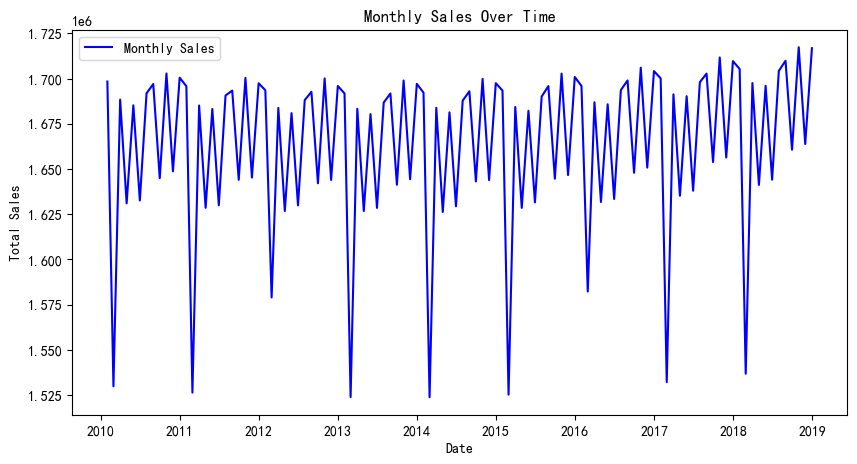

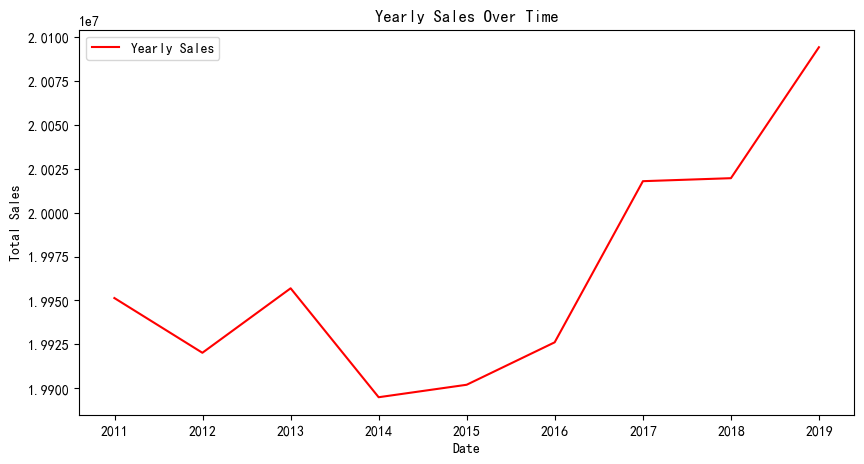

In [97]:
### 问题3：对上一题生成dataframe重新采样（按月和按年）后计算number_sold总量，然后绘制number_sold总量的折线图。

# 确保'Date'列是datetime类型并设置为索引
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# 按月重新采样并计算number_sold总量
monthly_sales = df.resample('M').sum()

# 按年重新采样并计算number_sold总量
yearly_sales = df.resample('A').sum()

# 绘制按月重新采样后的number_sold总量的折线图
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales['number_sold'], label='Monthly Sales', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Over Time')
plt.legend()
plt.show()

# 绘制按年重新采样后的number_sold总量的折线图
plt.figure(figsize=(10, 5))
plt.plot(yearly_sales.index, yearly_sales['number_sold'], label='Yearly Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Yearly Sales Over Time')
plt.legend()
plt.show()

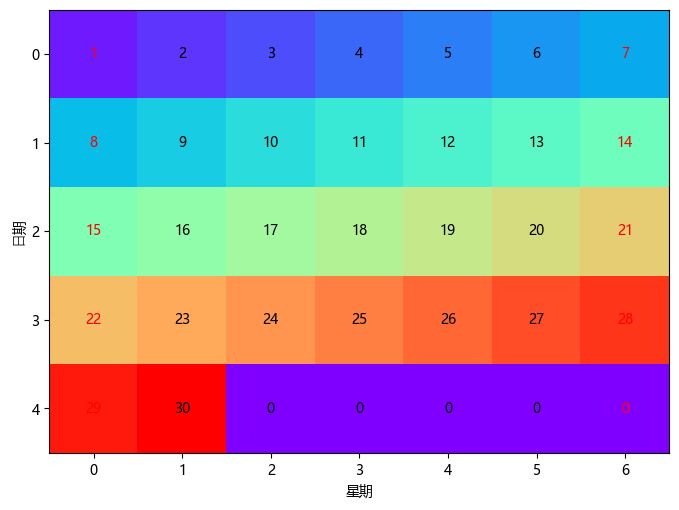

In [110]:
import calendar
import matplotlib.pyplot as plt
# 获取 2024 年 4 ⽉的⽇历
cal = calendar.monthcalendar(2024, 4)
# 绘制⽇历
plt.figure(figsize=(8, 8))
plt.imshow(cal, cmap="rainbow")
plt.xlabel("星期")
plt.ylabel("⽇期")
# 标记周末和⼯作⽇
for i in range(len(cal)):
    for j in range(len(cal[0])):
        if j in [0, 6]:
            plt.text(j, i, cal[i][j], color="red", ha='center', va='center')
        else:
            plt.text(j, i, cal[i][j], color="black", ha='center', va='center')
plt.show()

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

%matplotlib notebook

# 生成日期范围
dates = pd.date_range('2020-01', '2024-04', freq='M')

# 生成销售数据
np.random.seed(2024)
sales_data = pd.DataFrame({
    '日期': dates,
    '销售额': np.random.randint(100, 201, size=len(dates))
})

# 创建画布和子图
fig, ax = plt.subplots()
ax.set_xlim(sales_data['日期'].min(), sales_data['日期'].max())
ax.set_ylim(sales_data['销售额'].min(), sales_data['销售额'].max())
line, = ax.plot([], [], lw=2)

# 初始化函数
def init():
    line.set_data([], [])
    return line,

# 更新函数
def update(frame):
    if frame < len(sales_data):
        x = sales_data.loc[:frame, '日期']
        y = sales_data.loc[:frame, '销售额']
        line.set_data(x, y)
        ax.set_title(f"销售额: {y.iloc[-1]} (日期: {x.iloc[-1].strftime('%Y-%m')})")
    return line,

# 创建动画
ani = FuncAnimation(fig, update, frames=len(sales_data), init_func=init, blit=True, interval=1000)

plt.show()


<IPython.core.display.Javascript object>